In [2]:
import numpy as np
import matplotlib.pyplot as plt
from videotimings import *
MAX_FREQ = 1_000_000_000


In [3]:
# * TRACE METADATA HELPER
# path to file must look like hresxvres@fps#standard.trace
# a "mode" is hresxvres@fps#standard
def get_fps(path: str):
    return float(path.split("#")[0].split("@")[1].strip())


def get_x(path: str):
    return int(path.split("#")[0].split("x")[0].strip())


def get_y(path: str):
    return int(path.split("#")[0].split("x")[1].split("@")[0].strip())


def get_standard(path: str):
    return path.split("#")[1].strip()


# return a list with all clocks depending on all valid modes
def parse_mode_and_clock(path):
    outfile = open(path, "r")
    data = outfile.readlines()

    standards = ["cvt", "cvt_rb", "cvt_rb2", "dmt", "cea"]
    mode = []
    clock = []
    for line in data:
        # compute pixel clocks for different standards
        pxclocks = videotimings.compute_pxclock(
            get_x(line), get_y(line), get_fps(line)
        )[0]
        for pxclock, standard in zip(pxclocks, standards):
            # if existant, append to the list to check
            if pxclock != 0:
                mode.append(line.replace("\n", "") + "#" + standard)
                clock.append(int(pxclock))

    return clock, mode

In [4]:
clock_list, mode_list = parse_mode_and_clock("modes.txt")
harmonic_dict = {}
mode_dict = {}
for clock, mode in zip(clock_list, mode_list):
    temp = clock
    while temp < MAX_FREQ:
        harmonic_dict[str(temp)] = harmonic_dict.get(str(temp),0) + 1
        if str(temp) in mode_dict:
            mode_dict[str(temp)].append(mode)
        else:
            mode_dict[str(temp)] = [mode]
        temp += clock

print(harmonic_dict)

{'173000000': 1, '346000000': 1, '519000000': 1, '692000000': 1, '865000000': 1, '138500000': 2, '277000000': 2, '415500000': 2, '554000000': 2, '692500000': 2, '831000000': 2, '969500000': 2, '133320000': 1, '266640000': 1, '399960000': 1, '533280000': 1, '666600000': 1, '799920000': 1, '933240000': 1, '148500000': 10, '297000000': 18, '445500000': 10, '594000000': 19, '742500000': 10, '891000000': 18, '141500000': 1, '283000000': 1, '424500000': 1, '566000000': 1, '707500000': 1, '849000000': 1, '990500000': 1, '115000000': 1, '230000000': 1, '345000000': 1, '460000000': 1, '575000000': 1, '690000000': 1, '805000000': 1, '920000000': 2, '110599000': 1, '221198000': 1, '331797000': 1, '442396000': 1, '552995000': 1, '663594000': 1, '774193000': 1, '884792000': 1, '995391000': 1, '172750000': 1, '345500000': 1, '518250000': 1, '691000000': 1, '863750000': 1, '133186000': 1, '266372000': 1, '399558000': 1, '532744000': 1, '665930000': 1, '799116000': 1, '932302000': 1, '74500000': 2, '1

In [5]:
X = []
Y = []
for pair in harmonic_dict.items():
    X.append(int(pair[0]))
    Y.append(pair[1])

In [6]:
# sort Y based on X, ascending, then sort X
Y = [y for _, y in sorted(zip(X, Y))]
X = sorted(X)

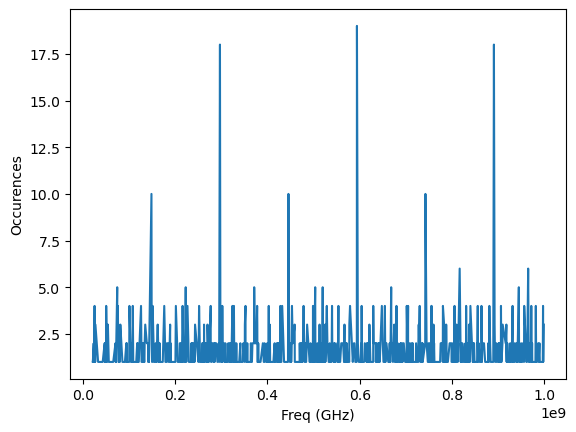

In [7]:
plt.xlabel("Freq (GHz)")
plt.ylabel("Occurences")
plt.plot(X,Y)
plt.savefig("overlap_harmonic.png", transparent = True, dpi=300)

In [8]:
X[Y.index(max(Y))]

594000000

In [10]:
print('\n'.join(mode_dict['594000000']))

1920x1080@60.0#dmt
1920x1080@60.0#cea
1920x1080@50.0#cea
1920x1080@59.94#dmt
1920x1080@59.94#cea
1280x720@60.0#dmt
1280x720@60.0#cea
1280x720@50.0#cea
1280x720@59.94#dmt
1280x720@59.94#cea
720x576@50.0#cea
720x480@60.0#cvt_rb2
720x480@60.0#cea
720x480@59.94#cea
3840x2160@30.0#cea
3840x2160@25.0#cea
3840x2160@24.0#cea
3840x2160@29.97#cea
3840x2160@23.98#cea


In [42]:
#3840x2160@30.0#cea
freq_4k30 = 297_000_000
freq_2k60 = 148_500_000
freq_foo = 25_175_000
harmonics_4k = [i for i in range(1,MAX_FREQ,freq_4k30)]
harmonics_2k = [i for i in range(1,MAX_FREQ,freq_2k60)]
harmonics_foo = [i for i in range(1,MAX_FREQ,freq_foo)]

([], [])

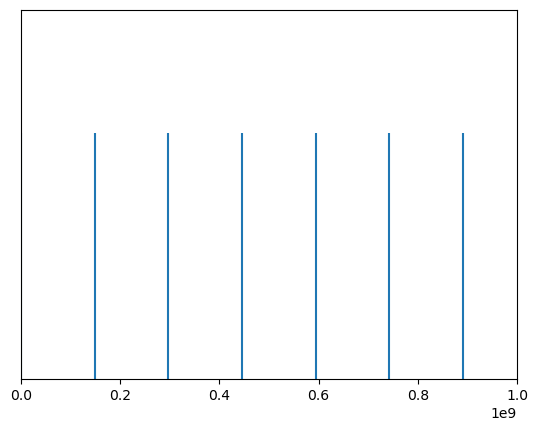

In [38]:
plt.figure()
plt.vlines(harmonics_2k, 0, 1)
plt.xlim([0,MAX_FREQ])
plt.ylim([0,1.5])
plt.yticks([])


([], [])

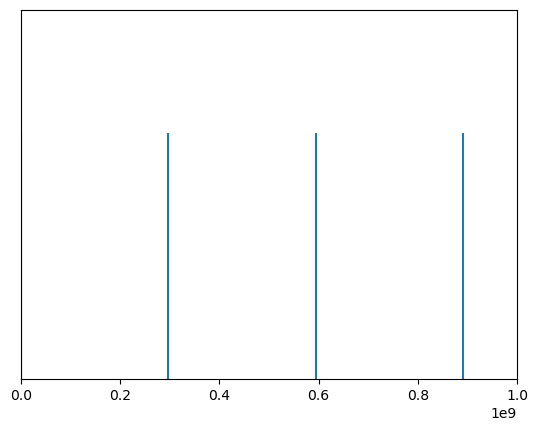

In [39]:
plt.figure()
plt.vlines(harmonics_4k, 0, 1)
plt.xlim([0,MAX_FREQ])
plt.ylim([0,1.5])
plt.yticks([])


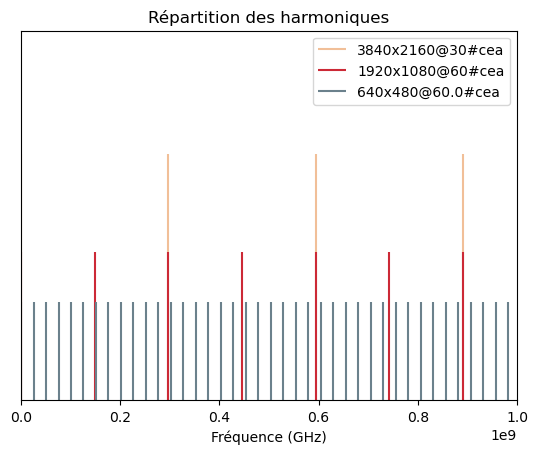

In [49]:
plt.figure()
plt.vlines(harmonics_4k, 0, 1, colors="#F1BF98", label="3840x2160@30#cea")
plt.vlines(harmonics_2k, 0, 0.6, colors="#CC2936", label="1920x1080@60#cea")
plt.vlines(harmonics_foo, 0, 0.4, colors="#6B818C", label="640x480@60.0#cea")
plt.xlim([0,MAX_FREQ])
plt.ylim([0,1.5])
plt.yticks([])
plt.legend()
plt.xlabel("Fréquence (GHz)")
plt.title("Répartition des harmoniques")
plt.savefig("harmonics_rep.png", dpi=300, transparent=True)